In [1]:
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Exasens.csv')
df

,Diagnosis,ID,Imagery_part_min,Imagery_part_avg,Real_part_min,Real_part_avg,Gender,Age,Smoking
0,COPD,301-4,-320.61,-300.563531,-495.26,-464.171991,1,77,2
1,COPD,302-3,-325.39,-314.750360,-473.73,-469.263140,0,72,2
2,COPD,303-3,-323.00,-317.436056,-476.12,-471.897667,1,73,3
3,COPD,304-4,-327.78,-317.399670,-473.73,-468.856388,1,76,2
4,COPD,305-4,-325.39,-316.155785,-478.52,-472.869783,0,65,2
...,...,...,...,...,...,...,...,...,...
394,Infected,I176,NaN,NaN,NaN,NaN,0,49,2
395,Infected,I177,NaN,NaN,NaN,NaN,0,37,1
396,Infected,I178,NaN,NaN,NaN,NaN,0,29,1
397,Infected,I179,NaN,NaN,NaN,NaN,1,51,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399 entries, 0 to 398
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Diagnosis         399 non-null    object 
 1   ID                399 non-null    object 
 2   Imagery_part_min  100 non-null    float64
 3   Imagery_part_avg  100 non-null    float64
 4   Real_part_min     100 non-null    float64
 5   Real_part_avg     100 non-null    float64
 6   Gender            399 non-null    int64  
 7   Age               399 non-null    int64  
 8   Smoking           399 non-null    int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 28.2+ KB


In [4]:
print('Diagnosis',df.Diagnosis.unique())
df['Diagnosis'].replace({'COPD':1,'HC':2,'Asthma':3,'Infected':4},inplace=True)
df

Diagnosis ['COPD' 'HC' 'Asthma' 'Infected']


,Diagnosis,ID,Imagery_part_min,Imagery_part_avg,Real_part_min,Real_part_avg,Gender,Age,Smoking
0,1,301-4,-320.61,-300.563531,-495.26,-464.171991,1,77,2
1,1,302-3,-325.39,-314.750360,-473.73,-469.263140,0,72,2
2,1,303-3,-323.00,-317.436056,-476.12,-471.897667,1,73,3
3,1,304-4,-327.78,-317.399670,-473.73,-468.856388,1,76,2
4,1,305-4,-325.39,-316.155785,-478.52,-472.869783,0,65,2
...,...,...,...,...,...,...,...,...,...
394,4,I176,NaN,NaN,NaN,NaN,0,49,2
395,4,I177,NaN,NaN,NaN,NaN,0,37,1
396,4,I178,NaN,NaN,NaN,NaN,0,29,1
397,4,I179,NaN,NaN,NaN,NaN,1,51,1


In [5]:
df['Imagery_part_min'].fillna(df['Imagery_part_min'].median(), inplace = True)
df['Imagery_part_avg'].fillna(df['Imagery_part_avg'].median(), inplace = True)
df['Real_part_min'].fillna(df['Real_part_min'].median(), inplace = True)
df['Real_part_avg'].fillna(df['Real_part_avg'].median(), inplace = True)

In [6]:
df

,Diagnosis,ID,Imagery_part_min,Imagery_part_avg,Real_part_min,Real_part_avg,Gender,Age,Smoking
0,1,301-4,-320.61,-300.563531,-495.26,-464.171991,1,77,2
1,1,302-3,-325.39,-314.750360,-473.73,-469.263140,0,72,2
2,1,303-3,-323.00,-317.436056,-476.12,-471.897667,1,73,3
3,1,304-4,-327.78,-317.399670,-473.73,-468.856388,1,76,2
4,1,305-4,-325.39,-316.155785,-478.52,-472.869783,0,65,2
...,...,...,...,...,...,...,...,...,...
394,4,I176,-323.00,-314.327176,-473.73,-467.136002,0,49,2
395,4,I177,-323.00,-314.327176,-473.73,-467.136002,0,37,1
396,4,I178,-323.00,-314.327176,-473.73,-467.136002,0,29,1
397,4,I179,-323.00,-314.327176,-473.73,-467.136002,1,51,1


In [7]:
df.isnull().sum()

Diagnosis           0
ID                  0
Imagery_part_min    0
Imagery_part_avg    0
Real_part_min       0
Real_part_avg       0
Gender              0
Age                 0
Smoking             0
dtype: int64

In [8]:
korelasi = df.corr()
korelasi

,Diagnosis,Imagery_part_min,Imagery_part_avg,Real_part_min,Real_part_avg,Gender,Age,Smoking
Diagnosis,1.000000,-0.128851,-0.158967,-0.010989,-0.079252,-0.257085,-0.373838,-0.122870
Imagery_part_min,-0.128851,1.000000,0.979969,0.428429,0.441340,0.040204,0.081181,-0.032614
Imagery_part_avg,-0.158967,0.979969,1.000000,0.361730,0.445996,0.061558,0.091264,-0.032274
Real_part_min,-0.010989,0.428429,0.361730,1.000000,0.868340,-0.067549,0.006128,0.021302
Real_part_avg,-0.079252,0.441340,0.445996,0.868340,1.000000,-0.009185,0.014999,0.036029
Gender,-0.257085,0.040204,0.061558,-0.067549,-0.009185,1.000000,0.230465,0.072074
Age,-0.373838,0.081181,0.091264,0.006128,0.014999,0.230465,1.000000,0.135352
Smoking,-0.122870,-0.032614,-0.032274,0.021302,0.036029,0.072074,0.135352,1.000000


In [9]:
data = (df[["Imagery_part_avg", "Real_part_avg"]])
data.head()

,Imagery_part_avg,Real_part_avg
0,-300.563531,-464.171991
1,-314.750360,-469.263140
2,-317.436056,-471.897667
3,-317.399670,-468.856388
4,-316.155785,-472.869783


In [10]:
dataa = (data[["Imagery_part_avg", "Real_part_avg"]])
X = dataa.iloc[:, [0, 1]].values
X

array([[-300.5635307 , -464.1719907 ],
       [-314.7503595 , -469.2631404 ],
       [-317.4360556 , -471.8976667 ],
       [-317.3996698 , -468.856388  ],
       [-316.1557853 , -472.8697828 ],
       [-318.6775535 , -469.0241943 ],
       [-320.6174777 , -467.3618538 ],
       [-314.3271765 , -467.13600245],
       [-307.5995856 , -470.1816328 ],
       [-300.104765  , -466.3786343 ],
       [-308.117898  , -466.13057   ],
       [-306.2530384 , -466.5250462 ],
       [-294.2698616 , -463.1934272 ],
       [-299.0552022 , -421.1894102 ],
       [-297.9901    , -428.9503667 ],
       [-314.3271765 , -467.13600245],
       [-314.3271765 , -467.13600245],
       [-293.0287817 , -431.9906508 ],
       [-294.366142  , -414.6756675 ],
       [-317.1295776 , -468.8069765 ],
       [-314.5167598 , -467.7786275 ],
       [-228.        , -442.        ],
       [-225.        , -443.        ],
       [-314.3271765 , -467.13600245],
       [-315.61542   , -464.3431669 ],
       [-312.7602773 , -4

In [11]:
m=X.shape[0] #number of training examples
n=X.shape[1] #number of features. Here n=2

In [12]:
n_iter=10
K=2

In [13]:
Centroids=np.array([]).reshape(n,0)

In [14]:
for i in range(K):
    rand=rd.randint(0,m-1)
    Centroids=np.c_[Centroids,X[rand]]

In [15]:
EuclidianDistance=np.array([]).reshape(m,0)
for k in range(K):
  tempDist=np.sum((X-Centroids[:,k])**2,axis=1)
  EuclidianDistance=np.c_[EuclidianDistance,tempDist]
C=np.argmin(EuclidianDistance,axis=1)+1

In [16]:
Output={}

In [17]:
Y={}
for k in range(K):
    Y[k+1]=np.array([]).reshape(2,0)
for i in range(m):
    Y[C[i]]=np.c_[Y[C[i]],X[i]]
     
for k in range(K):
    Y[k+1]=Y[k+1].T
    
for k in range(K):
     Centroids[:,k]=np.mean(Y[k+1],axis=0)

In [18]:
for i in range(n_iter):
     #step 2.a
      EuclidianDistance=np.array([]).reshape(m,0)
      for k in range(K):
          tempDist=np.sum((X-Centroids[:,k])**2,axis=1)
          EuclidianDistance=np.c_[EuclidianDistance,tempDist]
      C=np.argmin(EuclidianDistance,axis=1)+1
     #step 2.b
      Y={}
      for k in range(K):
          Y[k+1]=np.array([]).reshape(2,0)
      for i in range(m):
          Y[C[i]]=np.c_[Y[C[i]],X[i]]
     
      for k in range(K):
          Y[k+1]=Y[k+1].T
    
      for k in range(K):
          Centroids[:,k]=np.mean(Y[k+1],axis=0)
      Output=Y

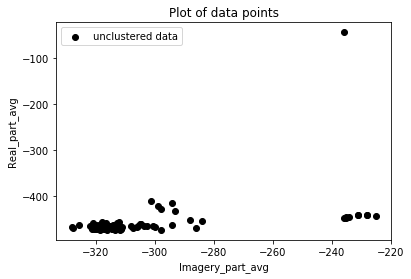

In [19]:
plt.scatter(X[:,0],X[:,1],c='black',label='unclustered data')
plt.xlabel('Imagery_part_avg')
plt.ylabel('Real_part_avg')
plt.legend()
plt.title('Plot of data points')
plt.show()

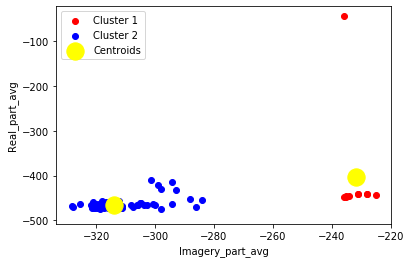

In [20]:
color=['red','blue']
labels=['Cluster 1','Cluster 2']
for k in range(K):
    plt.scatter(Output[k+1][:,0],Output[k+1][:,1],c=color[k],label=labels[k])
plt.scatter(Centroids[0,:],Centroids[1,:],s=300,c='yellow',label='Centroids')
plt.xlabel('Imagery_part_avg')
plt.ylabel('Real_part_avg')
plt.legend()
plt.show()

C:\Users\hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:882: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  f"KMeans is known to have a memory leak on Windows "


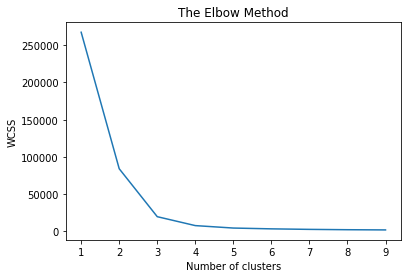

In [21]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 123)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 10), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

TypeError: '(slice(None, None, None), 0)' is an invalid key

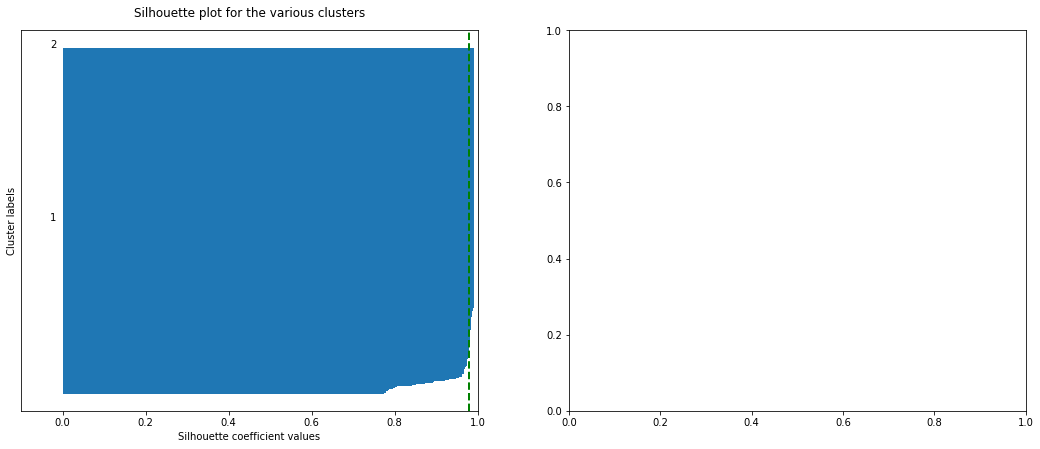

In [22]:
from sklearn.metrics import silhouette_samples

for i, k in enumerate([2, 3, 4]):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    
    # Run the Kmeans algorithm
    km = KMeans(n_clusters=K)
    labels = km.fit_predict(data)
    centroids = km.cluster_centers_

    # Get silhouette samples
    silhouette_vals = silhouette_samples(data, labels)

    # Silhouette plot
    y_ticks = []
    y_lower, y_upper = 0, 0
    for i, cluster in enumerate(np.unique(labels)):
        cluster_silhouette_vals = silhouette_vals[labels == cluster]
        cluster_silhouette_vals.sort()
        y_upper += len(cluster_silhouette_vals)
        ax1.barh(range(y_lower, y_upper), cluster_silhouette_vals, edgecolor='none', height=1)
        ax1.text(-0.03, (y_lower + y_upper) / 2, str(i + 1))
        y_lower += len(cluster_silhouette_vals)

    # Get the average silhouette score and plot it
    avg_score = np.mean(silhouette_vals)
    ax1.axvline(avg_score, linestyle='--', linewidth=2, color='green')
    ax1.set_yticks([])
    ax1.set_xlim([-0.1, 1])
    ax1.set_xlabel('Silhouette coefficient values')
    ax1.set_ylabel('Cluster labels')
    ax1.set_title('Silhouette plot for the various clusters', y=1.02);
    
    # Scatter plot of data colored with labels
    ax2.scatter(data[:, 0], data[:, 1], c=labels)
    ax2.scatter(centroids[:, 0], centroids[:, 1], marker='*', c='r', s=250)
    ax2.set_xlim([-2, 2])
    ax2.set_xlim([-2, 2])
    ax2.set_xlabel('Eruption time in mins')
    ax2.set_ylabel('Waiting time to next eruption')
    ax2.set_title('Visualization of clustered data', y=1.02)
    ax2.set_aspect('equal')
    plt.tight_layout()
    plt.suptitle(f'Silhouette analysis using k = {k}',
                 fontsize=16, fontweight='semibold', y=1.05);

Number Of Clusters:
2
Silhouette score value
0.8375514998221061
Number Of Clusters:
3
Silhouette score value
0.927228112125803
Number Of Clusters:
4
Silhouette score value
0.6192557492568919
Number Of Clusters:
5
Silhouette score value
0.4175305200412993
Number Of Clusters:
6
Silhouette score value
0.4354093565130506
Number Of Clusters:
7
Silhouette score value
0.4469264935026961
Number Of Clusters:
8
Silhouette score value
0.34581422848326593
Number Of Clusters:
9
Silhouette score value
0.34197777822132297
Number Of Clusters:
10
Silhouette score value
0.34694262922897934
Number Of Clusters:
11
Silhouette score value
0.32179086772936394
Number Of Clusters:
12
Silhouette score value
0.339256165831688
Number Of Clusters:
13
Silhouette score value
0.3267941547342345
Number Of Clusters:
14
Silhouette score value
0.3347011977106576
Number Of Clusters:
15
Silhouette score value
0.31582646831890543
Number Of Clusters:
16
Silhouette score value
0.32815355701777016
Number Of Clusters:
17
Silhou

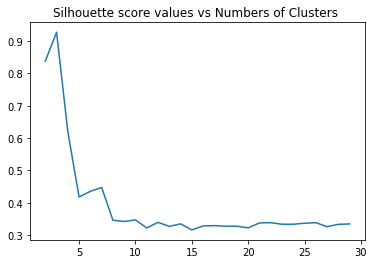

Optimal number of components is:
3


In [23]:
from sklearn import cluster
import numpy as numpy
import sklearn
import matplotlib.pyplot as plt


obs = numpy.concatenate( (numpy.random.randn(100, 2) , 20 + numpy.random.randn(300, 2) , -15+numpy.random.randn(200, 2)))
silhouette_score_values=list()

NumberOfClusters=range(2,30)

for i in NumberOfClusters:
    
    classifier=cluster.KMeans(i,init='k-means++', n_init=10, max_iter=300, tol=0.0001, verbose=0, random_state=None, copy_x=True)
    classifier.fit(obs)
    labels= classifier.predict(obs)
    print("Number Of Clusters:")
    print(i)
    print("Silhouette score value")
    print(sklearn.metrics.silhouette_score(obs,labels ,metric='euclidean', sample_size=None, random_state=None))
    silhouette_score_values.append(sklearn.metrics.silhouette_score(obs,labels ,metric='euclidean', sample_size=None, random_state=None))

plt.plot(NumberOfClusters, silhouette_score_values)
plt.title("Silhouette score values vs Numbers of Clusters ")
plt.show()

Optimal_NumberOf_Components=NumberOfClusters[silhouette_score_values.index(max(silhouette_score_values))]
print("Optimal number of components is:")
print(Optimal_NumberOf_Components)

In [24]:
from sklearn.metrics import silhouette_score

sil = []
kmax = 10

for k in range(2, kmax+1):
  kmeans = KMeans(n_clusters = K).fit(data)
  labels = kmeans.labels_
  sil.append(silhouette_score(data, labels, metric = 'euclidean'))
sil

[0.9788772024401009,
 0.9788772024401009,
 0.9788772024401009,
 0.9788772024401009,
 0.9788772024401009,
 0.9788772024401009,
 0.9788772024401009,
 0.9788772024401009,
 0.9788772024401009]